# Shared Sequences Simulation

#### Here we perform a simulation during which we generate an artificial dataset with the clone size distribution following a power law.

#### We subsample the generated dataset twice with decreasing fractions and count how many shared sequences the two subsampled datasets have.

#### The output is a plot of a fraction of shared sequences against the fraction to which the generated dataset is subsempled to.

In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
%matplotlib inline

In [2]:
cd /Users/kgrigait/Desktop/new_data

/Users/kgrigait/Desktop/new_data


In [3]:
def power_law(exponent, max_clone_size, sample_size):
    """This function simulates a dataset of clone sizes that follows a powerlaw
    distribution with a given exponent.
    Inputs:
    -exponent = exponent of the powerlaw distribution equation (y=1/x^exponent),
    -max_clone_size = the maximum possible clone size in the simulated dataset.
    note that it does not mean maximum clone size will appear in the generated
    dataset,
    -sample_size = wanted number of datapoints in the dataset.
    Returns:
    -numpy array of clone sizes that has a size of sample_size parameter."""
    #arrange numpy array of number from 1 to max_clone_size+1 in the float format.
    x = np.arange(1, max_clone_size+1, dtype='float')
    #plug each value into powerlaw equation to start generating probability mass function (pmf)
    pmf = 1/x**exponent
    #divide each pmf value by the sum of all the pmf values. The sum of the resulting
    #pmf array should become 1.
    pmf /= pmf.sum()
    #np.random.choice function generates a random sample of a given sample size
    #from a given 1-D array x, given the probabilities for each value.
    return np.random.choice(x, sample_size, p=pmf)

In [4]:
#Define the variables.
exponent = 3.0
max_clone_size = 700
sample_size = 1000000

#Generate clone size array
clone_sizes=power_law(exponent, max_clone_size, sample_size)

In [5]:
#Take the clone sizes and back-generate the dataframe of sequences
#(identified by numbers)
data=pd.DataFrame(clone_sizes)
data.columns=['number']
data=pd.concat([data,pd.DataFrame(data.index.tolist())],axis=1)
data.columns=['number','label']

In [6]:
#initiate sequence array
data_final=np.array([])

for i in range(0,len(data)):
    #for each index, make an array of multiples of that index given the
    #clone size that index is associated with and append the sequence array.
    #this will take some time as it looping over a million indeces.
    number=data.number.iloc[i]
    data_final=np.append(data_final,np.array([data.label.iloc[i]]*number))

/Users/kgrigait/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [7]:
#Make a dataframe of sequences (identified by a number) and subsample down to a sample size of 1 million.
S=pd.DataFrame(data_final)
S.columns=['label']
data = S.sample(n=1000000)

#Calculate clone sizes and their frequencies for plotting the distribution.
k=pd.DataFrame(data.label.value_counts())
k=k.label.value_counts()
x=np.array(k.index)
y=np.array(k)
y=np.divide(y,int(np.sum(y))+0.0)

#### Figure 5D

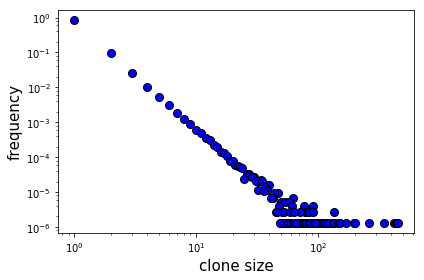

In [8]:
f, ax = plt.subplots()
ax.plot(x, y, 'o', color='blue', markeredgecolor='black', markersize=8.0,alpha=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('clone size',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.tight_layout()
plt.savefig('simulated_powerlaw.png')

In [9]:
#Define arrays for downsampling and recording number of shared sequences for each subsample 
#and standard deviations acquired through bootstrapping.
F=np.arange(1.0,0.05,-0.05)
F=np.append(F,([0.05,0.01]))
R=([])
std=([])
bootstrap=10

In [10]:
#loop over subsample fractions
for k in range(0,len(F)):
    #initiate an array for recording a number of shared sequences while bootstrapping.
    a=([])
    for i in range(0,bootstrap):
        #subsample twice given the fraction.
        s1 = data.sample(frac=F[k])
        s2 = data.sample(frac=F[k])
        #count the number of sequences shared between the two subsampled dataframes
        S1=pd.DataFrame(s1.label.unique())
        S2=pd.DataFrame(s2.label.unique())
        S=pd.concat([S1,S2],axis=0)
        S.columns=['label']
        #update the array with the number of shared sequences each time
        a=np.append(a,sum(S.label.value_counts()==2)/len(S.label.value_counts()))
    #update arrays with mean number and standard deviation of shared sequences from the bootstrapping
    R=np.append(R, np.mean(a))
    std=np.append(std, np.std(a))
#calculate standard error of the mean
SEM=np.divide(std,bootstrap**0.5)

#### Figure 5E

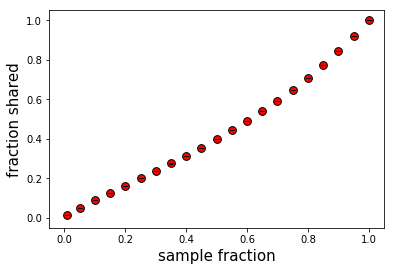

In [13]:
f, ax = plt.subplots()
ax.scatter(F,R,color='red', edgecolor='black', marker='o', s=60, alpha=1)
ax.errorbar(F, R, yerr=SEM, ls='none', color='black', elinewidth=1, capsize=2)
ax.set_xlabel("sample fraction",fontsize=15)
ax.set_ylabel("fraction shared",fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.savefig('Shared_sequences_simulation.png')